Import and Dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

students = pd.read_csv('Student_Performance.csv')
students

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# Support Vector Regression

In [4]:
X = students.iloc[:, :-1].values
y = students.iloc[:, -1].values

Label Encoder for 'Extracurricular Activities'

In [9]:
from sklearn.preprocessing import LabelEncoder
encoded = LabelEncoder()
X[:,2] = encoded.fit_transform(X[:,2])
print(X)

[[7 99 1 9 1]
 [4 82 0 4 2]
 [8 51 1 7 2]
 ...
 [6 83 1 8 5]
 [9 97 1 7 0]
 [7 74 0 8 1]]


We can also scale the numbers

In [10]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = y.reshape(-1,1)
y = sc_y.fit_transform(y)

Split Data and Use SVR

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = SVR()
regressor.fit(X_train, y_train)

/home/vp/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predict Values

In [15]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred), 1)), sc_y.inverse_transform(y_test.reshape(len(y_test), 1))), 1)

array([[50.87, 53.  ],
       [52.84, 50.  ],
       [78.54, 80.  ],
       ...,
       [64.64, 66.  ],
       [25.52, 27.  ],
       [18.33, 21.  ]])

# Decision Tree Using the Same Variables

In [16]:
from sklearn.tree import DecisionTreeRegressor

reg_Dtree = DecisionTreeRegressor()

reg_Dtree.fit(X_train, y_train)

DecisionTreeRegressor()

Predictions For Decision Tree

In [17]:
y_Dtree_pred = reg_Dtree.predict(X_test)
np.set_printoptions(precision=2)

np.concatenate((sc_y.inverse_transform(y_Dtree_pred.reshape(len(y_pred), 1)), sc_y.inverse_transform(y_test.reshape(len(y_test), 1))), 1)

array([[49., 53.],
       [54., 50.],
       [74., 80.],
       ...,
       [63., 66.],
       [22., 27.],
       [18., 21.]])

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

reg_RF = RandomForestRegressor(n_estimators=15)

reg_RF.fit(X_train, y_train)

/home/vp/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=15)

Predictions

In [29]:
y_RF_pred = reg_RF.predict(X_test)
np.set_printoptions(precision=2)

np.concatenate((sc_y.inverse_transform(y_RF_pred.reshape(len(y_pred), 1)), sc_y.inverse_transform(y_test.reshape(len(y_test), 1))), 1)

array([[49.07, 53.  ],
       [53.67, 50.  ],
       [78.83, 80.  ],
       ...,
       [64.18, 66.  ],
       [24.63, 27.  ],
       [17.91, 21.  ]])

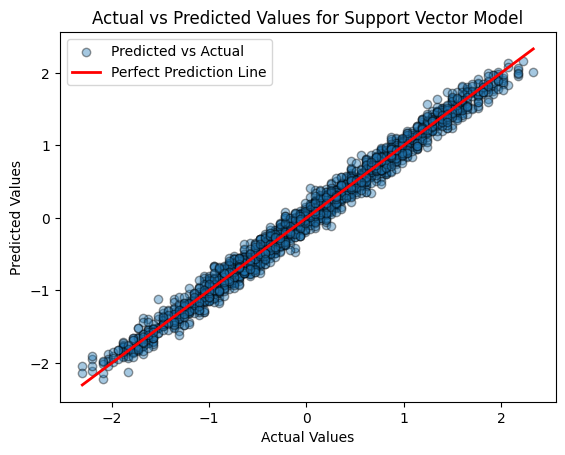

In [41]:
from matplotlib.pyplot import plot

plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.4, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Support Vector Model')
plt.legend()
plt.show()

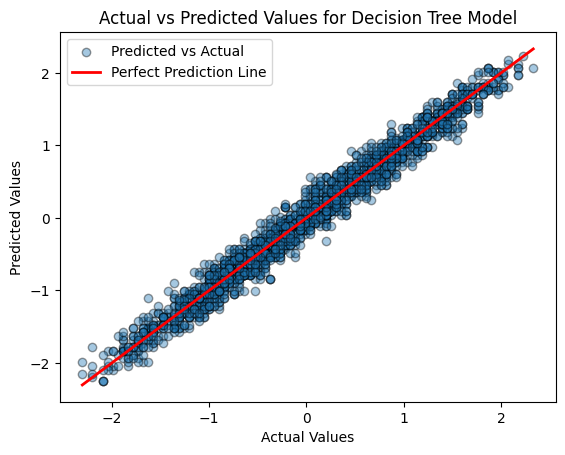

Bad pipe message: %s [b'"Google Chrome";v="129", "Not=A?Brand";v="8", "Chromium";']
Bad pipe message: %s [b'"129"\r\nsec-ch-ua-mobile: ?0\r\nsec-ch-ua-platform: "Windows"\r\nDNT: 1\r\nUpgrade-Insecure-Requests: 1\r\nUser-Agent: Mozilla', b'.0 (Windows NT 10.0; Win64; x64) AppleWebKit/5', b'.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/53', b'36\r\nAccept: text/html,application/xhtml+xml,applicatio']
Bad pipe message: %s [b'ol: max-age=0\r\nsec-ch-ua: "Google Chrome";v="129", "Not=A?Brand";v="8", "Chromium";v="129"\r\nsec-ch-ua-mobile: ?0\r\ns']
Bad pipe message: %s [b'-ch-ua-platform: "Windows"\r\nDNT: 1\r\nUpgrade-Insecure-Requests: 1\r\nUser-Agent: Mozilla/5.0 (Windows N', b'10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/53']
Bad pipe message: %s [b'36\r\nAccept: text/html,application/xhtml+xml,applicatio']


In [42]:
plt.scatter(y_test, y_Dtree_pred, edgecolor='k', alpha=0.4, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Model')
plt.legend()
plt.show()

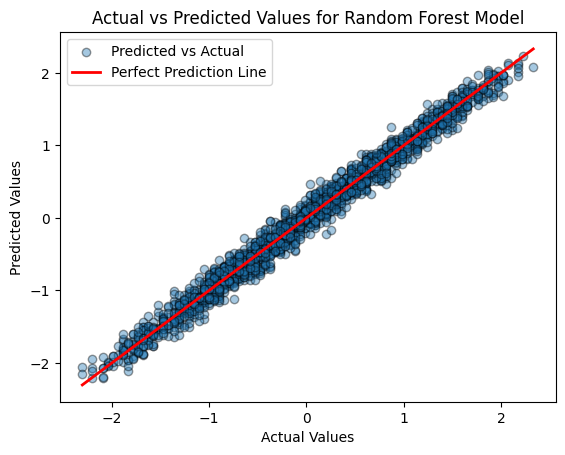

In [39]:
plt.scatter(y_test, y_RF_pred, edgecolor='k', alpha=0.4, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Model')
plt.legend()
plt.show()